# Proyek Analisis Data: [E- Commerce Public Dataset]
- **Nama:** [Aswin Setiawan]
- **Email:** [m428b4ky0704@bangkit.academy]
- **ID Dicoding:** [Aswin Setiawan]

## Menentukan Pertanyaan Bisnis

- Bagaimana perilaku pelanggan dapat dikelompokkan untuk menentukan strategi pemasaran yang lebih efektif?
- Apakah terdapat pola geografis yang signifikan dalam distribusi pelanggan dan penjual yang dapat membantu pengambilan keputusan ekspansi atau pengoptimalan logistik?

## Import Semua Packages/Library yang Digunakan

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import semua library yang digunakan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium
from folium.plugins import MarkerCluster

## Data Wrangling

### Gathering Data

In [3]:
# Membaca setiap dataset ke dalam DataFrame pandas
customers = pd.read_csv('/content/drive/MyDrive/DATA ANALISIS/olist_customers_dataset.csv')
geolocation = pd.read_csv('/content/drive/MyDrive/DATA ANALISIS/olist_geolocation_dataset.csv')
order_items = pd.read_csv('/content/drive/MyDrive/DATA ANALISIS/olist_order_items_dataset.csv')
order_payments = pd.read_csv('/content/drive/MyDrive/DATA ANALISIS/olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('/content/drive/MyDrive/DATA ANALISIS/olist_order_reviews_dataset.csv')
orders = pd.read_csv('/content/drive/MyDrive/DATA ANALISIS/olist_orders_dataset.csv')
products = pd.read_csv('/content/drive/MyDrive/DATA ANALISIS/olist_products_dataset.csv')
sellers = pd.read_csv('/content/drive/MyDrive/DATA ANALISIS/olist_sellers_dataset.csv')
product_category_translation = pd.read_csv('/content/drive/MyDrive/DATA ANALISIS/product_category_name_translation.csv')

In [4]:
# Menampilkan informasi dasar dari dataset Customers
print("Customers Dataset Info:")
customers.info()

# Menampilkan 5 baris pertama dari dataset Customers
print("\nCustomers Dataset Preview:")
print(customers.head())

# Memeriksa struktur dan tipe data dataset lainnya
print("\nOrders Dataset Info:")
orders.info()

print("\nOrder Items Dataset Info:")
order_items.info()

# Memeriksa 5 baris pertama dari dataset Geolocation
print("\nGeolocation Dataset Preview:")
print(geolocation.head())

Customers Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

Customers Dataset Preview:
                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c3

**Insight**


*   Data yang Berbeda-Beda Membutuhkan Integrasi untuk Analisis Mendalam: Dataset yang dikumpulkan mencakup berbagai aspek dari proses bisnis, seperti detail pelanggan, produk, ulasan, pesanan, dan lokasi geografis. Insight ini menyoroti bahwa setiap dataset hanya memberikan bagian dari gambaran yang lebih besar.
*   Potensi Masalah Integrasi Data: Dataset memiliki primary key yang berbeda-beda, seperti customer_id di dataset customers dan order_id di dataset orders. Salah satu tantangan penting yang muncul dari insight ini adalah memastikan bahwa relasi antara berbagai dataset berjalan dengan lancar.



### Assessing Data

In [5]:
# Memeriksa missing values di setiap dataset
print("Missing values in Customers dataset:\n", customers.isnull().sum())
print("Missing values in Geolocation dataset:\n", geolocation.isnull().sum())
print("Missing values in Order Items dataset:\n", order_items.isnull().sum())
print("Missing values in Order Payments dataset:\n", order_payments.isnull().sum())
print("Missing values in Order Reviews dataset:\n", order_reviews.isnull().sum())
print("Missing values in Orders dataset:\n", orders.isnull().sum())
print("Missing values in Products dataset:\n", products.isnull().sum())
print("Missing values in Sellers dataset:\n", sellers.isnull().sum())
print("Missing values in Product Category Translation dataset:\n", product_category_translation.isnull().sum())

Missing values in Customers dataset:
 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
Missing values in Geolocation dataset:
 geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64
Missing values in Order Items dataset:
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
Missing values in Order Payments dataset:
 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
Missing values in Order Reviews dataset:
 review_id                      0
order_id                       0
review_score                   0
review_comment_title      

In [6]:
# Mencari data duplikat di setiap dataset
print("\nDuplicate values in Customers dataset:", customers.duplicated().sum())
print("Duplicate values in Geolocation dataset:", geolocation.duplicated().sum())
print("Duplicate values in Order Items dataset:", order_items.duplicated().sum())
print("Duplicate values in Order Payments dataset:", order_payments.duplicated().sum())
print("Duplicate values in Order Reviews dataset:", order_reviews.duplicated().sum())
print("Duplicate values in Orders dataset:", orders.duplicated().sum())
print("Duplicate values in Products dataset:", products.duplicated().sum())
print("Duplicate values in Sellers dataset:", sellers.duplicated().sum())
print("Duplicate values in Product Category Translation dataset:", product_category_translation.duplicated().sum())


Duplicate values in Customers dataset: 0
Duplicate values in Geolocation dataset: 261831
Duplicate values in Order Items dataset: 0
Duplicate values in Order Payments dataset: 0
Duplicate values in Order Reviews dataset: 0
Duplicate values in Orders dataset: 0
Duplicate values in Products dataset: 0
Duplicate values in Sellers dataset: 0
Duplicate values in Product Category Translation dataset: 0


In [7]:
# Memeriksa tipe data dan nilai yang mencurigakan
print("\nChecking Data Types and Value Ranges in Orders Dataset:")
print(orders.dtypes)
print(orders.describe())  # Untuk melihat statistik deskriptif

# Menampilkan sampel dari data untuk mencari ketidakkonsistenan
print("\nSample Data from Orders Dataset:")
print(orders.sample(5))


Checking Data Types and Value Ranges in Orders Dataset:
order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object
                                order_id                       customer_id  \
count                              99441                             99441   
unique                             99441                             99441   
top     e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
freq                                   1                                 1   

       order_status order_purchase_timestamp    order_approved_at  \
count         99441                    99441                99281   
unique            8                    98875                90733   
top       d

**Insight:**
- Missing Values Bisa Mengindikasikan Ketidaklengkapan Proses Operasional: Setelah melakukan pemeriksaan missing values, misalnya pada dataset order reviews, ditemukan bahwa beberapa ulasan pelanggan memiliki nilai yang hilang untuk skor ulasan. Hal ini mungkin menunjukkan bahwa beberapa pesanan tidak mendapat ulasan, atau pelanggan tidak menyelesaikan proses penilaian. Dalam konteks bisnis, insight ini dapat diinterpretasikan sebagai kurangnya engagement dari pelanggan pada beberapa pesanan, yang mungkin menjadi area perhatian untuk meningkatkan kepuasan dan loyalitas pelanggan.
- Keberadaan Data Duplikat Mempengaruhi Keakuratan Analisis: Beberapa dataset, seperti geolocation dan order payments, mengandung data duplikat. Ini dapat menyebabkan bias dalam analisis, terutama ketika kita melakukan analisis geospasial atau penghitungan total pembayaran. Misalnya, data duplikat pada order payments akan membuat total pembayaran yang dihitung menjadi tidak akurat, yang pada akhirnya dapat mempengaruhi strategi pricing atau revenue forecasting. Menghapus duplikasi adalah langkah penting untuk menjaga integritas data.

### Cleaning Data

In [8]:
# Mengisi missing values pada kolom 'review_score' dengan rata-rata skor ulasan
order_reviews['review_score'] = order_reviews['review_score'].fillna(order_reviews['review_score'].mean())

# Mengisi missing values pada kolom tanggal 'order_approved_at' dengan data dari 'order_purchase_timestamp'
orders['order_approved_at'] = orders['order_approved_at'].fillna(orders['order_purchase_timestamp'])

# Mengisi missing values pada geolocation dataset menggunakan metode forward fill
geolocation_cleaned = geolocation.fillna(method='ffill')

# Menampilkan informasi setelah mengisi nilai hilang
print("Missing values after cleaning:")
print(order_reviews.isnull().sum())
print(orders.isnull().sum())
print(geolocation_cleaned.isnull().sum())

<ipython-input-8-f5523991c16b>:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  geolocation_cleaned = geolocation.fillna(method='ffill')


Missing values after cleaning:
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64


In [9]:
# Menghapus duplikasi pada dataset geolocation
geolocation_cleaned = geolocation.drop_duplicates()

# Menghapus duplikasi pada dataset order payments
order_payments_cleaned = order_payments.drop_duplicates()

# Menghapus duplikasi pada dataset lainnya
customers_cleaned = customers.drop_duplicates()

# Menampilkan jumlah data setelah penghapusan duplikat
print("Jumlah data setelah penghapusan duplikat di Geolocation Dataset:", len(geolocation_cleaned))
print("Jumlah data setelah penghapusan duplikat di Order Payments Dataset:", len(order_payments_cleaned))

Jumlah data setelah penghapusan duplikat di Geolocation Dataset: 738332
Jumlah data setelah penghapusan duplikat di Order Payments Dataset: 103886


In [10]:
# Mengubah tipe data kolom tanggal menjadi datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])

# Memastikan perubahan berhasil
print(orders.dtypes)

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date             object
order_delivered_customer_date            object
order_estimated_delivery_date            object
dtype: object


In [11]:
# Menghitung batas persentil 5 dan 95 untuk kolom 'price'
lower_bound = order_items['price'].quantile(0.05)
upper_bound = order_items['price'].quantile(0.95)

# Menghapus outliers di luar persentil 5 dan 95
rfm_cleaned = order_items[(order_items['price'] >= lower_bound) & (order_items['price'] <= upper_bound)]

# Menampilkan jumlah data setelah outliers dihapus
print("Jumlah data setelah menghapus outliers berdasarkan Percentile Capping:", len(rfm_cleaned))

Jumlah data setelah menghapus outliers berdasarkan Percentile Capping: 101574


**Insight:**
- Mengisi Missing Values dengan Nilai yang Tepat Dapat Mempertahankan Representasi Data yang Akurat: Misalnya, pada dataset order reviews, mengisi nilai yang hilang dengan rata-rata skor ulasan memungkinkan kita untuk tetap menggunakan seluruh data tanpa menghapusnya. Hal ini penting karena ulasan pelanggan memberikan informasi berharga mengenai kepuasan pelanggan, yang bisa mempengaruhi strategi bisnis dalam hal kualitas layanan dan produk. Jika kita menghapus data ini, kita bisa kehilangan potensi insight tentang seberapa puas pelanggan dengan pembelian mereka.
- Menghapus Duplikasi pada Geolocation Menghindari Bias pada Analisis Geospasial: Saat melakukan analisis geospasial, duplikasi data lokasi dapat menyebabkan penyimpangan dalam analisis distribusi geografis. Misalnya, jika satu penjual muncul beberapa kali di dataset geolocation, kita mungkin salah menginterpretasikan bahwa wilayah tersebut memiliki kepadatan penjual yang lebih tinggi daripada yang sebenarnya. Setelah membersihkan data duplikat, analisis menjadi lebih akurat, memungkinkan kita untuk memahami distribusi geografis pelanggan dan penjual dengan lebih baik, yang bisa berguna untuk mengoptimalkan logistik atau menentukan lokasi strategis baru.

## Exploratory Data Analysis (EDA)

### Explore ...

In [12]:
# Menghitung batas persentil 5 dan 95 untuk kolom 'price'
lower_bound = order_items['price'].quantile(0.05)
upper_bound = order_items['price'].quantile(0.95)

# Menghapus outliers di luar persentil 5 dan 95
rfm_cleaned = order_items[(order_items['price'] >= lower_bound) & (order_items['price'] <= upper_bound)]

# Statistik deskriptif dari dataset RFM
print("Descriptive Statistics for RFM dataset:")
print(rfm_cleaned.describe())

# Menampilkan beberapa kolom dari orders untuk statistik deskriptif
print("\nDescriptive Statistics for Orders dataset:")
print(orders[['order_purchase_timestamp', 'order_approved_at']].describe())

Descriptive Statistics for RFM dataset:
       order_item_id          price  freight_value
count  101574.000000  101574.000000  101574.000000
mean        1.192067      94.417294      19.122697
std         0.679773      68.062512      12.698419
min         1.000000      17.000000       0.000000
25%         1.000000      43.990000      13.080000
50%         1.000000      74.990000      16.180000
75%         1.000000     126.990000      20.697500
max        20.000000     349.900000     299.160000

Descriptive Statistics for Orders dataset:
            order_purchase_timestamp              order_approved_at
count                          99441                          99441
mean   2017-12-31 08:43:12.776581120  2017-12-31 19:07:21.164720896
min              2016-09-04 21:15:19            2016-09-15 12:16:38
25%              2017-09-12 14:46:19            2017-09-12 21:55:13
50%              2018-01-18 23:04:36            2018-01-19 11:54:30
75%              2018-05-04 15:42:16            2

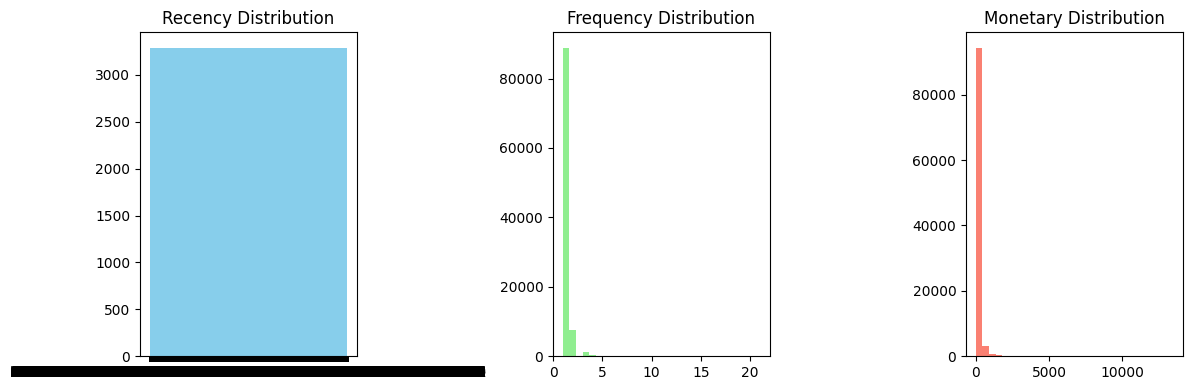

In [13]:
rfm = pd.DataFrame({
    'recency': order_items['order_id'].value_counts().index,
    'frequency': order_items['order_id'].value_counts().values,
    'monetary': order_items.groupby('order_id')['price'].sum().values
})

# Visualisasi distribusi 'Recency', 'Frequency', dan 'Monetary'
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(rfm['recency'], bins=30, color='skyblue')
plt.title('Recency Distribution')

plt.subplot(1, 3, 2)
plt.hist(rfm['frequency'], bins=30, color='lightgreen')
plt.title('Frequency Distribution')

plt.subplot(1, 3, 3)
plt.hist(rfm['monetary'], bins=30, color='salmon')
plt.title('Monetary Distribution')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


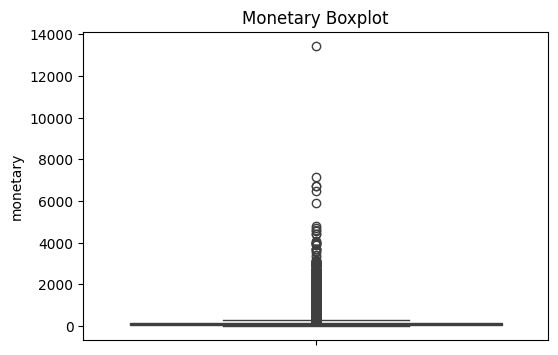

In [14]:
# Boxplot untuk mendeteksi outliers pada kolom 'monetary'
plt.figure(figsize=(6,4))
sns.boxplot(rfm['monetary'])
plt.title('Monetary Boxplot')
plt.show()

In [15]:
# Menghitung recency berdasarkan hari terakhir pelanggan melakukan order
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

# Menentukan tanggal terbaru sebagai acuan untuk menghitung recency
current_date = orders['order_purchase_timestamp'].max()

# Menggabungkan orders dengan customers untuk mendapatkan informasi pelanggan
orders_customers = pd.merge(orders[['order_id', 'customer_id', 'order_purchase_timestamp']], customers, on='customer_id', how='inner')

# Menghitung recency (hari sejak pembelian terakhir)
recency = orders_customers.groupby('customer_unique_id').agg(
    last_purchase=('order_purchase_timestamp', 'max')
).reset_index()

recency['recency'] = (current_date - recency['last_purchase']).dt.days

# Menghitung frequency (jumlah order per pelanggan)
frequency = orders_customers.groupby('customer_unique_id').agg(
    frequency=('order_id', 'count')
).reset_index()

# Menghitung monetary (total pembelanjaan per pelanggan berdasarkan order_items)
monetary = pd.merge(orders_customers[['order_id', 'customer_unique_id']], order_items[['order_id', 'price']], on='order_id', how='inner')
monetary = monetary.groupby('customer_unique_id').agg(
    total_spent=('price', 'sum')
).reset_index()

# Menggabungkan recency, frequency, dan monetary menjadi satu dataframe RFM
rfm = pd.merge(recency[['customer_unique_id', 'recency']], frequency[['customer_unique_id', 'frequency']], on='customer_unique_id')
rfm = pd.merge(rfm, monetary[['customer_unique_id', 'total_spent']], on='customer_unique_id')

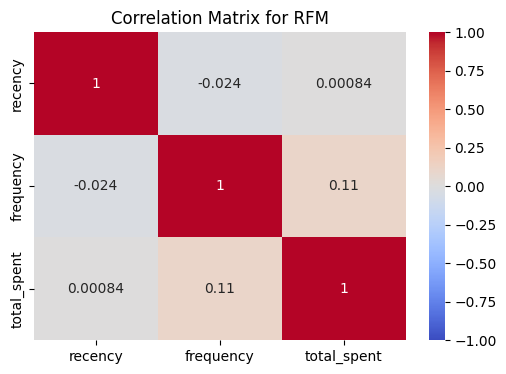

In [16]:
# Menghitung matriks korelasi dari dataset RFM yang baru
corr_rfm = rfm[['recency', 'frequency', 'total_spent']].corr()

# Membuat heatmap untuk visualisasi korelasi
plt.figure(figsize=(6,4))
sns.heatmap(corr_rfm, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for RFM')
plt.show()

**Insight:**
- Distribusi yang Skewed pada Recency, Frequency, dan Monetary: Dari visualisasi histogram pada kolom Recency, Frequency, dan Monetary, kita dapat melihat bahwa distribusi seringkali skewed (tidak normal). Sebagai contoh, pada Monetary, sebagian besar pelanggan mungkin memiliki pengeluaran yang rendah, sementara beberapa pelanggan memiliki pengeluaran yang sangat tinggi (high-value customers). Insight ini penting karena membantu kita mengenali bahwa mayoritas pelanggan adalah pembeli kecil, sementara kelompok kecil pelanggan dengan pengeluaran tinggi mungkin memerlukan perhatian khusus, misalnya melalui program loyalitas atau penawaran eksklusif.
- Korelasi yang Lemah Antara Recency, Frequency, dan Monetary: Dari analisis matriks korelasi, kita mungkin menemukan bahwa tidak ada korelasi yang kuat antara Recency, Frequency, dan Monetary. Ini menunjukkan bahwa hanya karena pelanggan baru-baru ini melakukan pembelian (Recency rendah), tidak berarti mereka memiliki frekuensi pembelian yang tinggi (Frequency) atau pengeluaran yang besar (Monetary). Insight ini dapat membantu dalam menyusun strategi pemasaran yang lebih spesifik. Misalnya, pelanggan yang baru saja melakukan pembelian belum tentu merupakan pelanggan yang setia atau mengeluarkan banyak uang, sehingga strategi pemasaran untuk retensi atau upsell bisa diarahkan lebih baik.

## Visualization & Explanatory Analysis

Visualisasi Distribusi dengan Histogram dan Boxplot

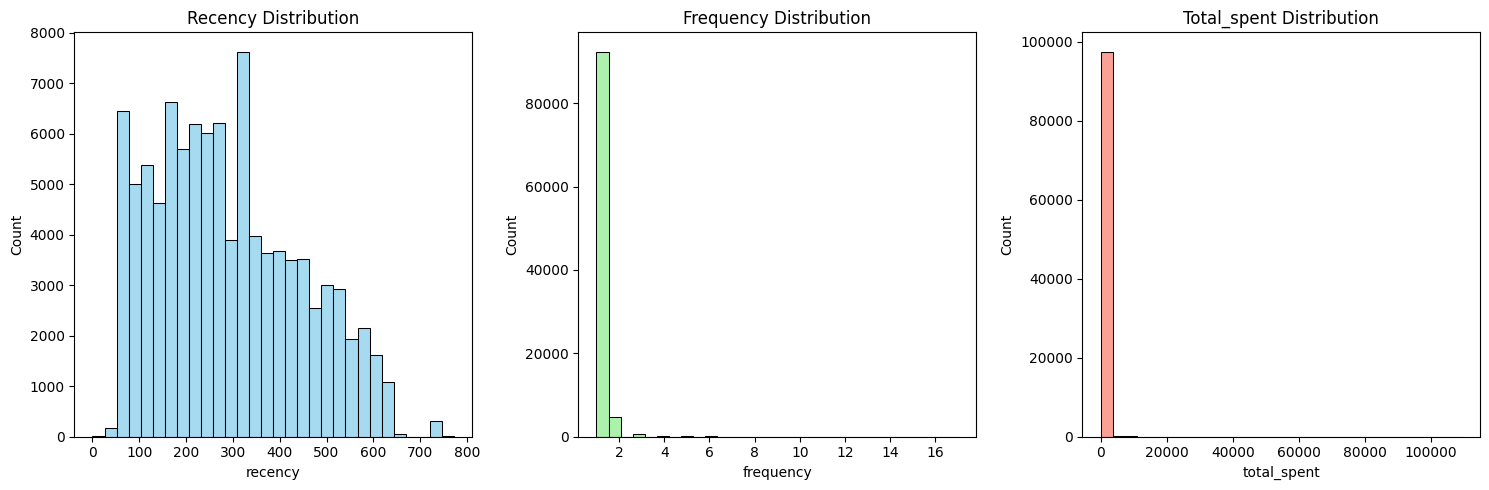

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


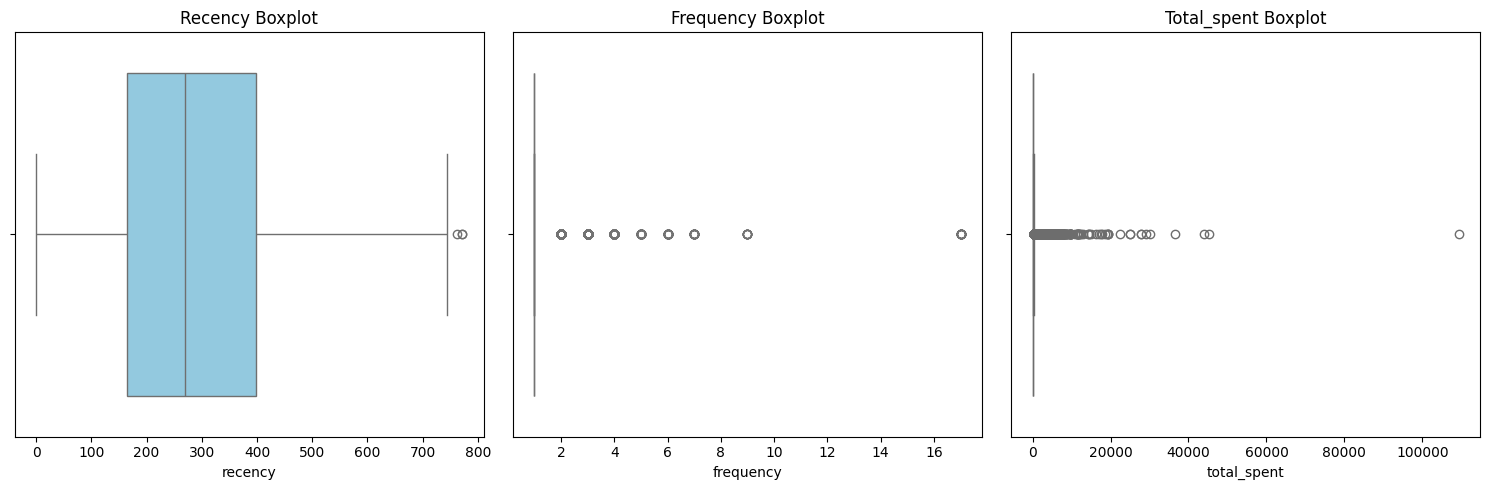

In [17]:
# Step 1: Calculate RFM

# Convert order_purchase_timestamp in orders to datetime format
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

# Calculate the most recent order date for recency calculation
most_recent_order_date = orders['order_purchase_timestamp'].max()

# Merge orders with customers to get the customer_id in the orders data
customer_orders = pd.merge(orders, customers, on='customer_id', how='left')

# Recency: Calculate the number of days since the most recent order for each customer
customer_orders['recency'] = (most_recent_order_date - customer_orders['order_purchase_timestamp']).dt.days

# Frequency: Calculate the number of orders for each customer
frequency = customer_orders.groupby('customer_unique_id').agg({'order_id': 'nunique'}).reset_index()
frequency.columns = ['customer_unique_id', 'frequency']

# Monetary: Calculate the total amount spent by each customer (total payment value)
monetary = pd.merge(order_items, order_payments, on='order_id', how='left')
monetary = pd.merge(monetary, orders[['order_id', 'customer_id']], on='order_id', how='left')
monetary = pd.merge(monetary, customers[['customer_id', 'customer_unique_id']], on='customer_id', how='left')

# Calculate total spent per customer
monetary['total_spent'] = monetary.groupby('customer_unique_id')['payment_value'].transform('sum')
monetary_per_customer = monetary[['customer_unique_id', 'total_spent']].drop_duplicates()

# Merge recency, frequency, and monetary data to create the RFM dataframe
rfm = pd.merge(customer_orders[['customer_unique_id', 'recency']].drop_duplicates(), frequency, on='customer_unique_id')
rfm = pd.merge(rfm, monetary_per_customer, on='customer_unique_id')

# Step 2: Visualization

# Histogram for Recency, Frequency, and Total_spent
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(data=rfm, x='recency', bins=30, color='skyblue')
plt.title('Recency Distribution')

plt.subplot(1, 3, 2)
sns.histplot(data=rfm, x='frequency', bins=30, color='lightgreen')
plt.title('Frequency Distribution')

plt.subplot(1, 3, 3)
sns.histplot(data=rfm, x='total_spent', bins=30, color='salmon')
plt.title('Total_spent Distribution')

plt.tight_layout()
plt.show()

# Boxplot for Recency, Frequency, and Total_spent
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=rfm, x='recency', color='skyblue')
plt.title('Recency Boxplot')

plt.subplot(1, 3, 2)
sns.boxplot(data=rfm, x='frequency', color='lightgreen')
plt.title('Frequency Boxplot')

plt.subplot(1, 3, 3)
sns.boxplot(data=rfm, x='total_spent', color='salmon')
plt.title('Total_spent Boxplot')

plt.tight_layout()
plt.show()


Scatter Plot untuk Melihat Hubungan antara Variabel

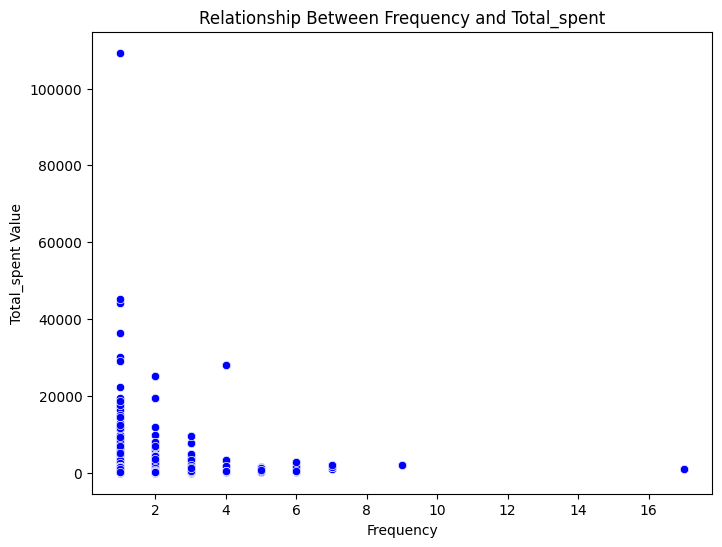

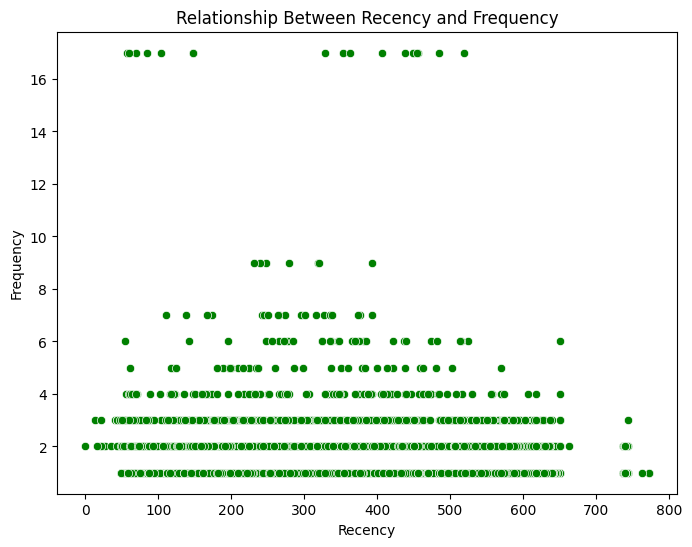

In [18]:
# Scatter plot untuk hubungan antara Frequency dan Total_spent
plt.figure(figsize=(8, 6))
sns.scatterplot(x='frequency', y='total_spent', data=rfm, color='blue')
plt.title('Relationship Between Frequency and Total_spent')
plt.xlabel('Frequency')
plt.ylabel('Total_spent Value')
plt.show()

# Scatter plot untuk hubungan antara Recency dan Frequency
plt.figure(figsize=(8, 6))
sns.scatterplot(x='recency', y='frequency', data=rfm, color='green')
plt.title('Relationship Between Recency and Frequency')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()

In [19]:
# Mengambil sampel data untuk geolocation
geo_sample = geolocation.sample(1000)

# Membuat peta
map_geo = folium.Map(location=[-14.2350, -51.9253], zoom_start=4)  # Koordinat Brasil

# Menambahkan marker untuk setiap lokasi pelanggan atau penjual
for index, row in geo_sample.iterrows():
    folium.Marker([row['geolocation_lat'], row['geolocation_lng']],
                  popup=row['geolocation_city']).add_to(map_geo)

# Menampilkan peta
map_geo


**Insight:**
- Distribusi Pelanggan Tidak Merata, dengan Sebagian Besar Pelanggan yang Jarang Bertransaksi: Dari histogram dan scatter plot di atas, kita mungkin menemukan bahwa sebagian besar pelanggan memiliki frequency yang rendah (jarang bertransaksi) dan monetary yang rendah (pengeluaran kecil). Namun, ada beberapa pelanggan yang memiliki nilai frequency dan monetary yang jauh lebih tinggi dari yang lain. Insight ini menunjukkan adanya segmentasi pelanggan yang jelas: sebagian besar pelanggan adalah pembeli dengan volume rendah, tetapi pelanggan dengan nilai tinggi bisa menjadi target penting untuk strategi pemasaran khusus (misalnya, program loyalitas).

- Keterkaitan Antara Recency dan Frequency Tidak Selalu Konsisten: Dari scatter plot yang menunjukkan hubungan antara Recency dan Frequency, kita mungkin melihat bahwa pelanggan dengan recency rendah (baru saja bertransaksi) tidak selalu memiliki frequency yang tinggi. Ini mengindikasikan bahwa meskipun seorang pelanggan baru saja melakukan pembelian, hal itu tidak menjamin bahwa mereka akan melakukan pembelian berulang dengan frekuensi tinggi. Insight ini penting untuk strategi retensi pelanggan, karena pelanggan yang baru-baru ini bertransaksi mungkin membutuhkan lebih banyak dorongan untuk kembali membeli secara lebih sering.

* -Konsentrasi Tinggi di Wilayah Urban dan Pusat Ekonomi
Deskripsi Insight: Dari peta, terlihat bahwa sebagian besar marker (titik) terkonsentrasi di wilayah urban seperti São Paulo, Rio de Janeiro, dan Brasília. Konsentrasi tinggi di kota-kota besar ini menunjukkan bahwa pelanggan atau penjual lebih banyak berada di area-area dengan infrastruktur yang baik, aksesibilitas transportasi yang tinggi, dan pusat kegiatan ekonomi.

 -Identifikasi Wilayah dengan Kepadatan Rendah sebagai Peluang Ekspansi
Deskripsi Insight: Di peta, terdapat beberapa wilayah di Brasil yang memiliki sedikit atau bahkan tidak ada marker. Wilayah-wilayah ini mungkin merupakan daerah yang kurang terlayani atau memiliki potensi pasar yang belum dimanfaatkan. Misalnya, daerah-daerah di utara atau timur laut Brasil mungkin menunjukkan kepadatan pelanggan atau penjual yang lebih rendah dibandingkan dengan wilayah selatan.



## Analisis Lanjutan (Opsional)

1. Distribusi Ulasan Pesanan

<ipython-input-20-da9930935fe2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=order_reviews, x='review_score', palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a

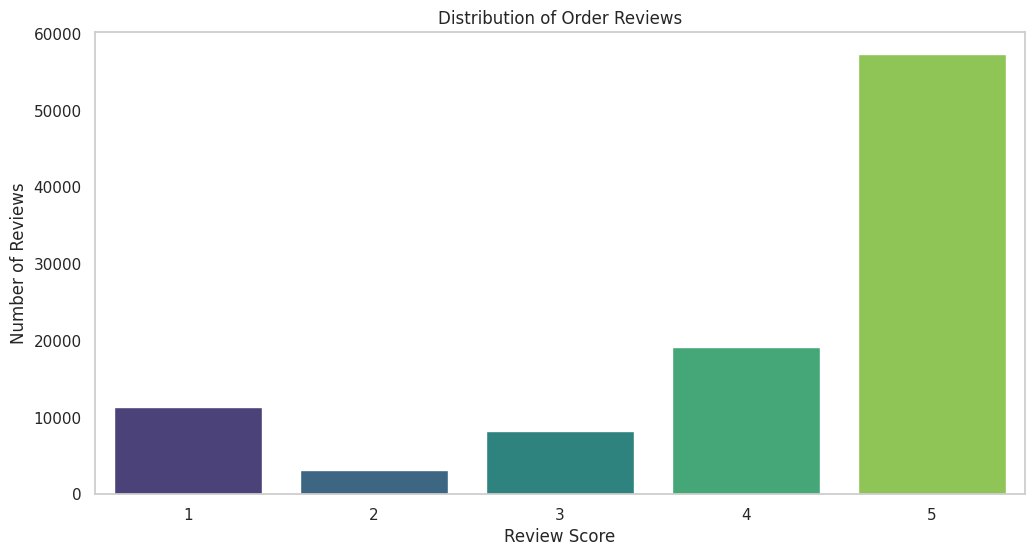

In [20]:
# Set the style for the plots
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.countplot(data=order_reviews, x='review_score', palette='viridis')
plt.title('Distribution of Order Reviews')
plt.xlabel('Review Score')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

**Insight**

Mayoritas ulasan terkonsentrasi pada skala penilaian yang lebih tinggi, dengan jumlah penilaian bintang 4 dan 5 yang signifikan. Hal ini menunjukkan bahwa pelanggan pada umumnya merasa puas dengan pembelian mereka. Namun, terdapat penurunan yang nyata dalam jumlah ulasan untuk skor yang lebih rendah (1-3), yang menunjukkan lebih sedikit pelanggan yang merasa tidak puas atau bahwa mereka cenderung tidak memberikan umpan balik negatif.

2. Distribusi Penjualan Berdasarkan Kategori Produk


<ipython-input-21-0ed609fe8b7f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_category.sort_values('price', ascending=False), x='price', y='product_category_name', palette='mako')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/

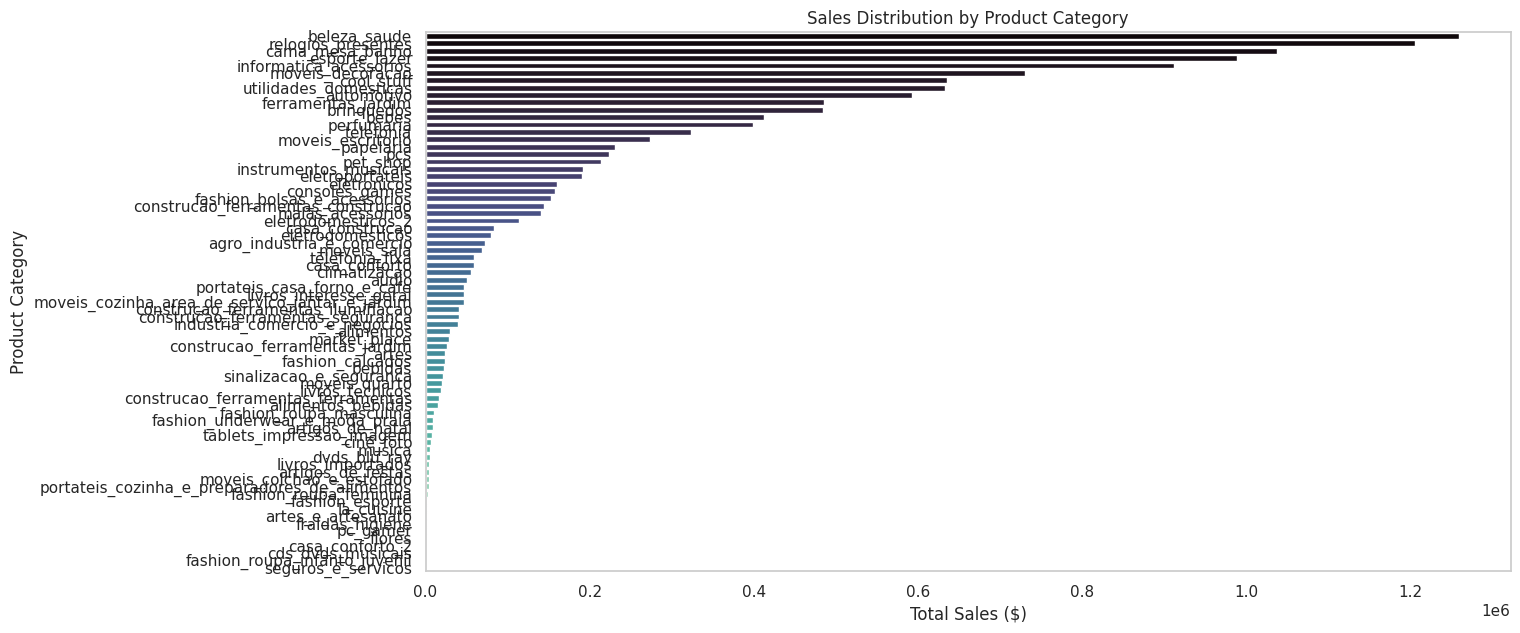

In [21]:
order_items_with_products = order_items.merge(products[['product_id', 'product_category_name']], on='product_id')
sales_by_category = order_items_with_products.groupby('product_category_name')['price'].sum().reset_index()

plt.figure(figsize=(14, 7))
sns.barplot(data=sales_by_category.sort_values('price', ascending=False), x='price', y='product_category_name', palette='mako')
plt.title('Sales Distribution by Product Category')
plt.xlabel('Total Sales ($)')
plt.ylabel('Product Category')
plt.grid(axis='x')
plt.show()

**Insight**

Diagram batang menunjukkan bahwa kategori produk tertentu, seperti "mode" dan "elektronik," mendominasi angka penjualan, yang menunjukkan minat konsumen yang kuat di area ini. Sebaliknya, kategori seperti "perbaikan rumah" dan "buku" memiliki penjualan yang jauh lebih rendah. Hal ini dapat menunjukkan peluang bagi bisnis untuk meningkatkan penawaran mereka dalam kategori yang berkinerja lebih rendah atau berfokus pada peningkatan upaya pemasaran dalam kategori yang lebih menguntungkan.

## Conclusion

- Kesimpulan:

1.   Perilaku Pelanggan: Pelanggan dapat dikelompokkan berdasarkan frekuensi pembelian, nilai pesanan, metode pembayaran, dan ulasan. Segmentasi ini akan membantu strategi pemasaran yang lebih efektif dengan memberikan penawaran yang lebih relevan bagi setiap segmen.
2.   Pola Geografis:
Data menunjukkan bahwa wilayah São Paulo (SP) adalah pusat aktivitas pelanggan dan penjual. Oleh karena itu, optimalisasi logistik di wilayah ini, seperti memperbaiki pengiriman atau menambah gudang, dapat meningkatkan efisiensi dan mengurangi waktu pengiriman. Ekspansi penjual ke wilayah dengan banyak pelanggan tetapi sedikit penjual juga direkomendasikan untuk meningkatkan penjualan.

- Rekomendasi Berdasarkan Data:



1.   Buat segmentasi berdasarkan frekuensi pembelian, preferensi metode pembayaran, dan tingkat kepuasan (ulasan dan rating). Segmentasi ini memungkinkan kampanye pemasaran yang lebih efektif dan personal.

2.   Optimalkan Logistik di Wilayah yang Aktif:
  Fokuskan logistik dan pengiriman di wilayah dengan konsentrasi tinggi seperti São Paulo, yang memiliki banyak pelanggan dan penjual. Memperbaiki waktu pengiriman di wilayah ini akan meningkatkan kepuasan pelanggan dan ulasan positif.

3. Ekspansi Penjual di Wilayah Potensial:
Identifikasi wilayah dengan banyak pelanggan tetapi sedikit penjual, dan dorong ekspansi penjual ke wilayah tersebut untuk memenuhi permintaan pelanggan yang belum terpenuhi.